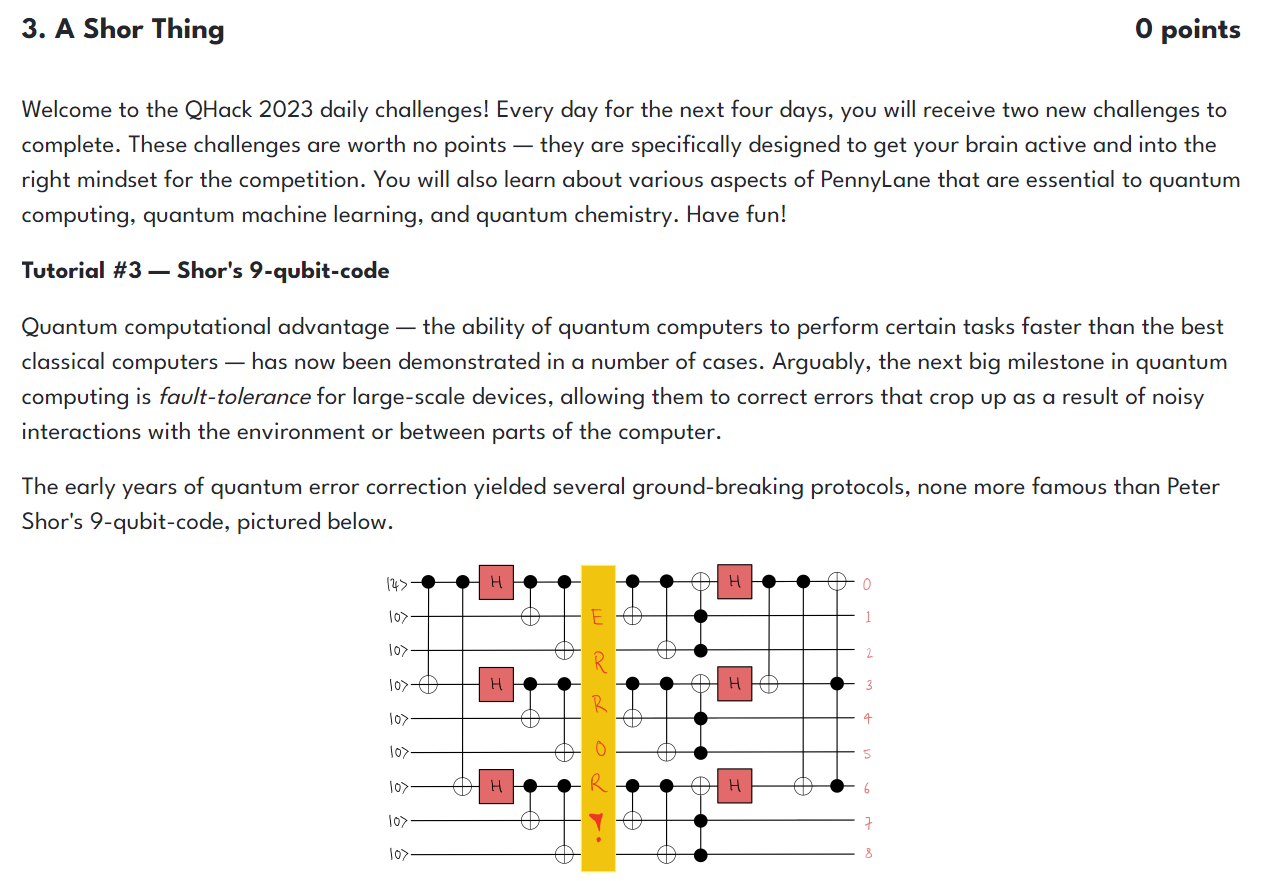

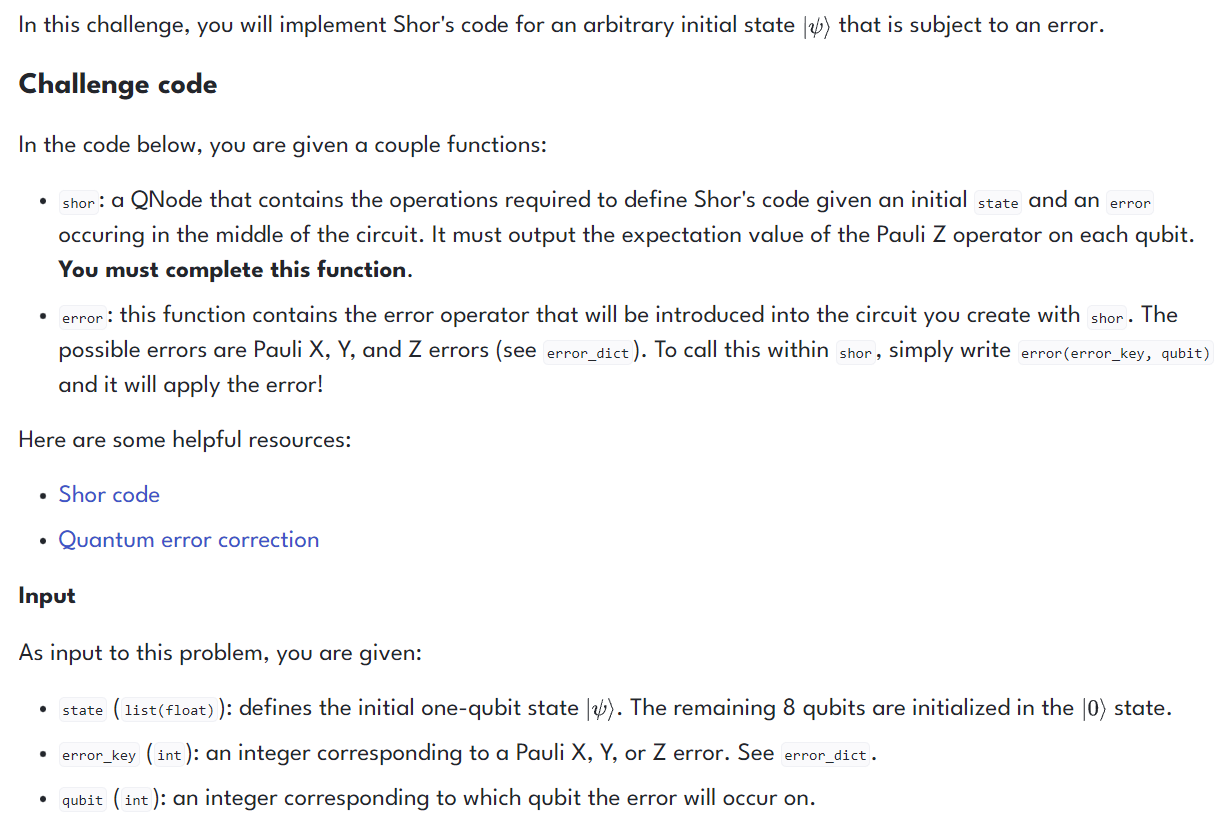

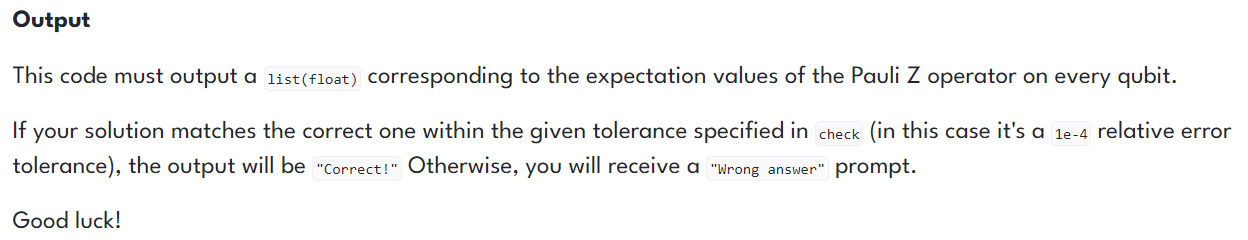

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)
error_dict = {0: 'PauliX', 1: 'PauliY', 2: 'PauliZ'}

def error(error_key, qubit):
    """Defines the error that is induced in the circuit.

    Args:
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.
    """
    getattr(qml, error_dict[error_key])(qubit)

@qml.qnode(dev)
def shor(state, error_key, qubit):
    """A circuit defining Shor's code for error correction.

    Args:
        state (list(float)): The quantum state of the first qubit in the circuit.
        error_key (int): An integer associated to the type of error (Pauli X, Y, or Z)
        qubit (int): The qubit that the error occurs on.

    Returns:
        (list(float)): The expectation value of the Pauli Z operator on every qubit.
    """
    qml.QubitStateVector(np.array(state), wires=0)


    # Put your code here #


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    state, error_key, qubit = json.loads(test_case_input)
    output = shor(state, error_key, qubit).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-4)


test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")